<a href="https://colab.research.google.com/github/Kriskan17/Berkeley_AIML/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [5]:


# Mount Google drive to load the data
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [33]:
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load the data from the file to a dataframe
df = pd.read_csv('/content/drive/My Drive/data/bank-additional-full.csv', sep = ';')

In [ ]:
#Examine the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
#Examine the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

The data is from direct marketing campaign of a portugal bank, the goal is to predict if the client will subscribe to a term deposit.

The dataset has 5 float, 5 int and 11 object data types with 41188 rows and 21 columns

In [8]:
#check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no NAN values in the dataset

In [9]:
#drop dups
df.duplicated().sum()
df1=df.drop_duplicates()

In [10]:
# reset index after dropping dupes
df1.reset_index(drop=True)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 12 duplicate rows which need to be deleted.

In [11]:
# print the unique values for each feature
for feat in df.columns.to_list():
    print("Feature Name:", [feat])
    print("unique labels:",df[feat].unique())
    print("No of unique labels:",df[feat].nunique())
    print(df[feat].shape[0])

Feature Name: ['age']
unique labels: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
No of unique labels: 78
41188
Feature Name: ['job']
unique labels: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
No of unique labels: 12
41188
Feature Name: ['marital']
unique labels: ['married' 'single' 'divorced' 'unknown']
No of unique labels: 4
41188
Feature Name: ['education']
unique labels: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
No of unique labels: 8
41188
Feature Name: ['default']
unique labels: ['no' 'unknown' 'yes']
No of unique labels: 3
41188
Feature Name: ['housing']
unique labels: ['no' 'yes' 'unknown']
No of unique labels: 

# Lets review the distribution of the features and the class variable y

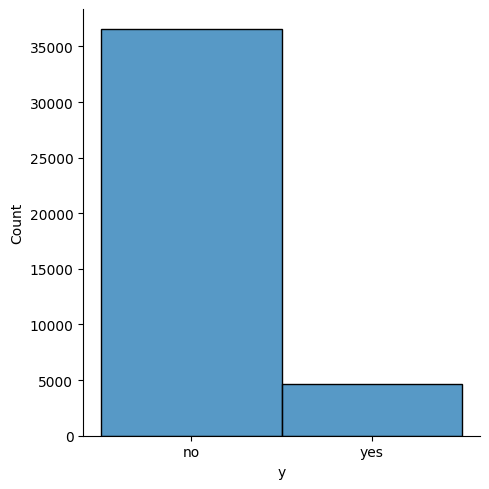

In [12]:
# distribution of univariate 'y'
sns.displot(df1, x="y")

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1000 with 0 Axes>

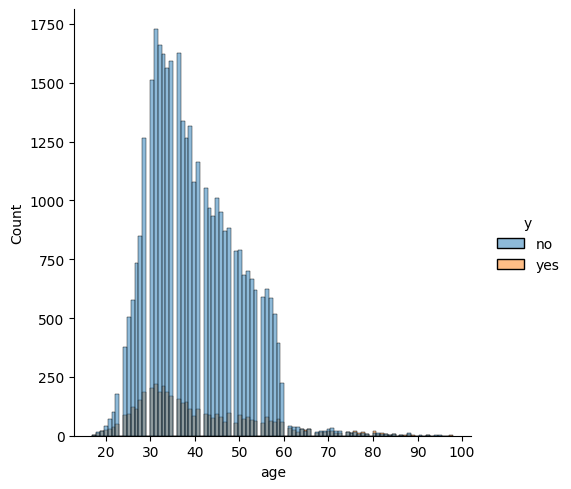

In [13]:
# age distribution
plt.figure(figsize=(20,10))
sns.displot(df1, x="age",hue="y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

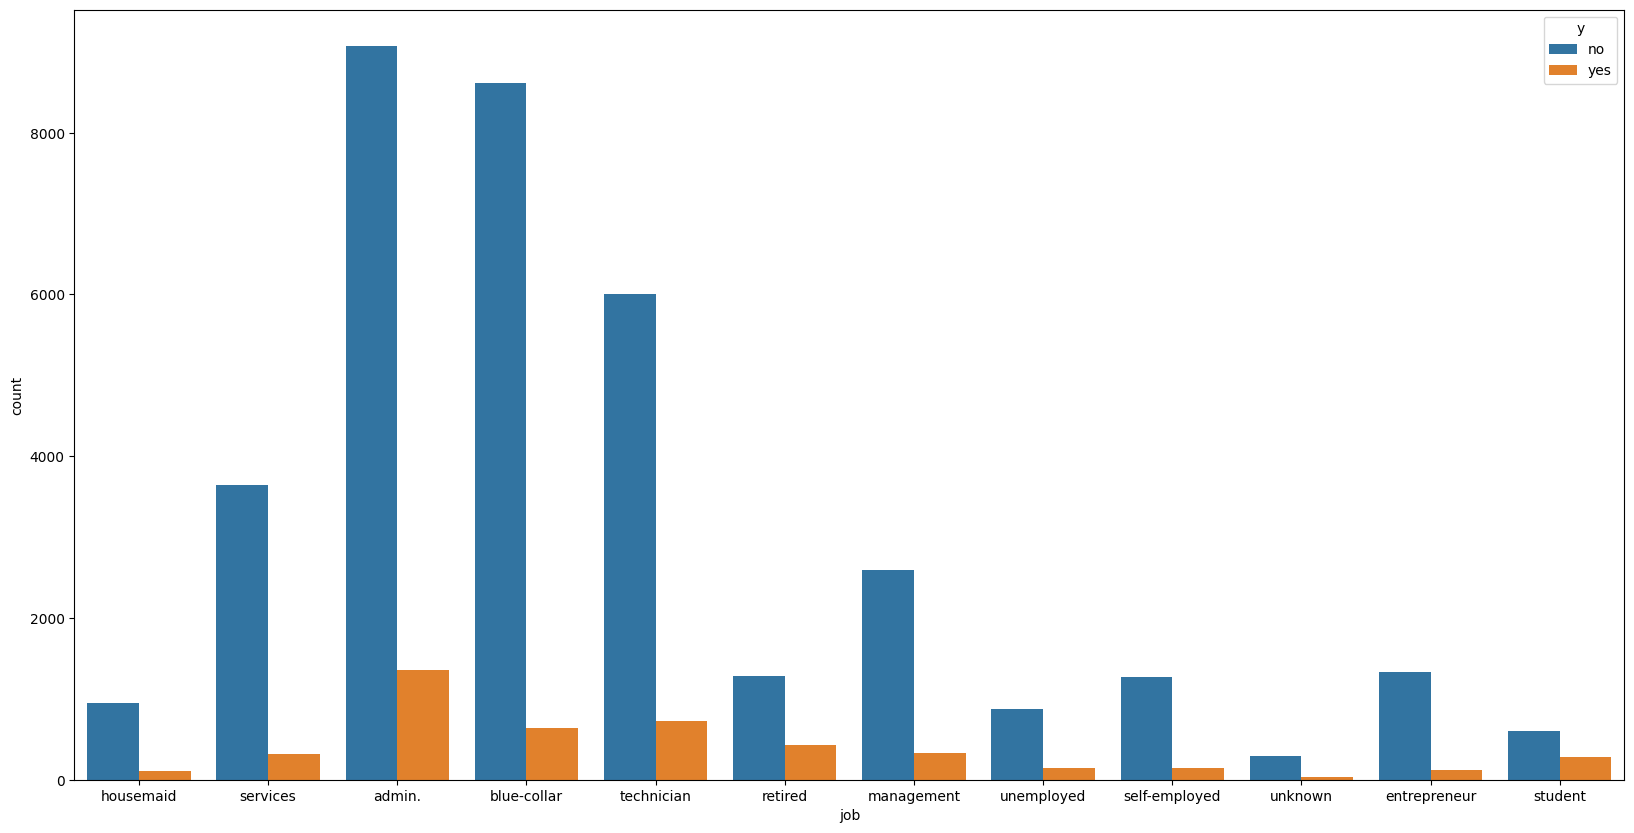

In [14]:
# plot to review job type for each demographic
plt.figure(figsize=(20,10))
sns.countplot(df1, x="job",hue="y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

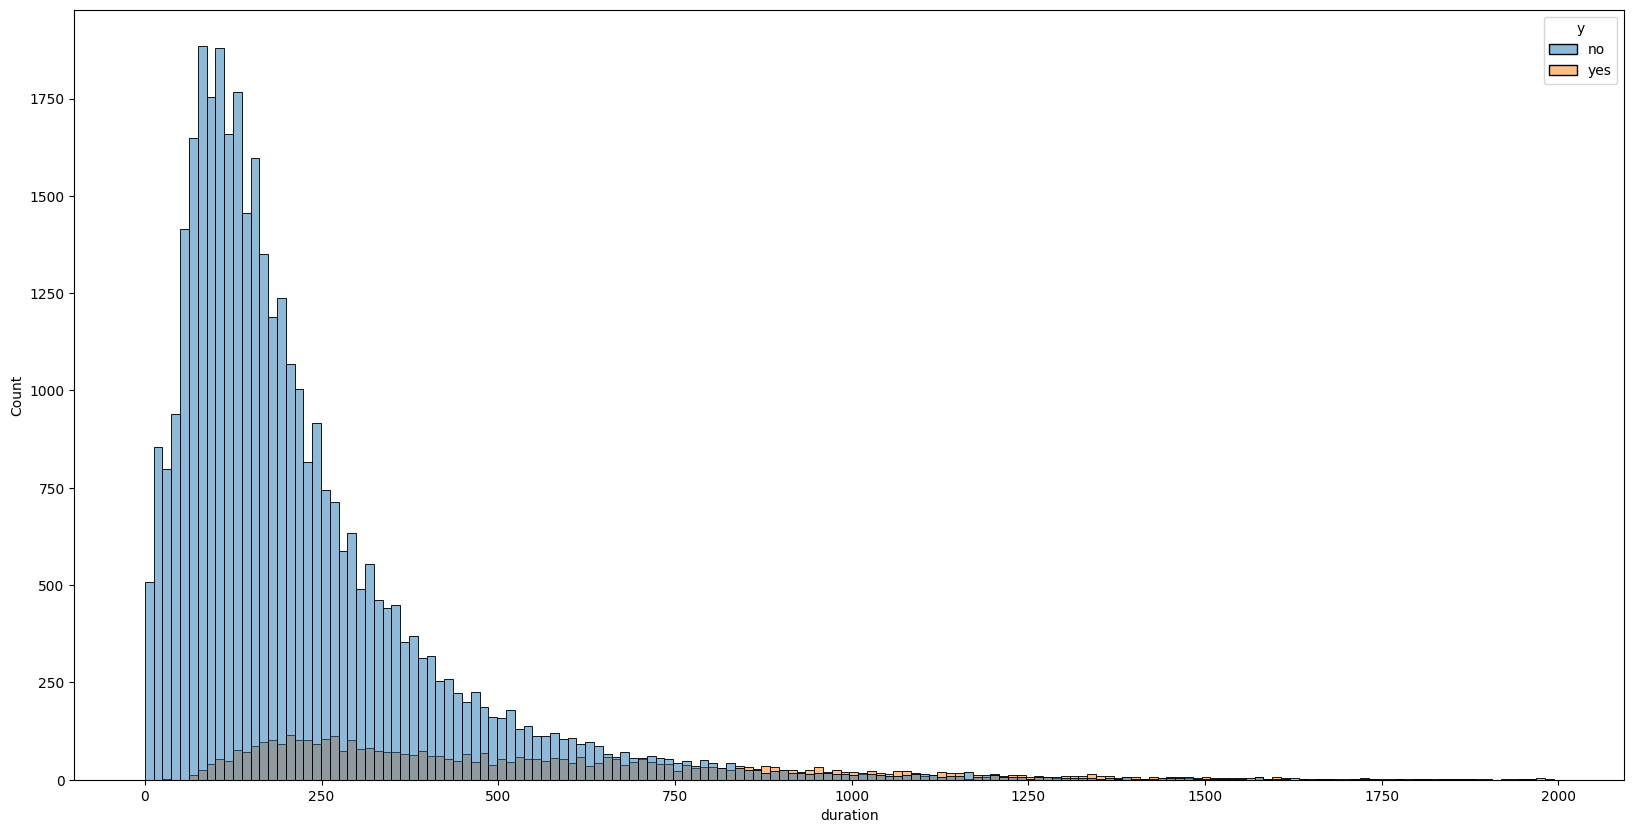

In [15]:
# duration of the calls
plt.figure(figsize=(20,10))
sns.histplot(data=df1.query('duration<2000'),x='duration',hue='y')
plt.show

* we notice that the duration of the calls are longer when the customer accepts the program.

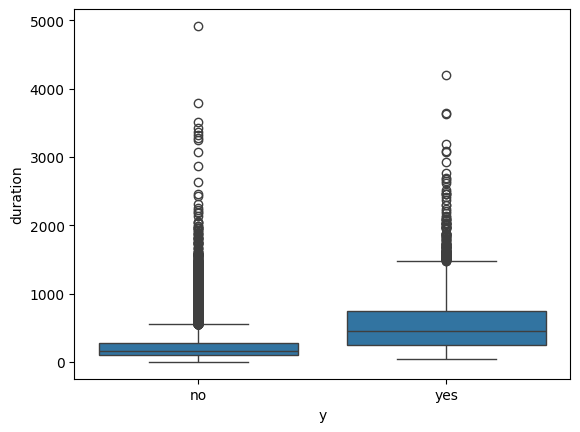

In [16]:
%matplotlib inline
sns.boxplot(data=df1, x="y", y="duration")
plt.show()

In [ ]:
# correlation matrix for the dataset
df1.corr()

<ipython-input-24-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


<Axes: >

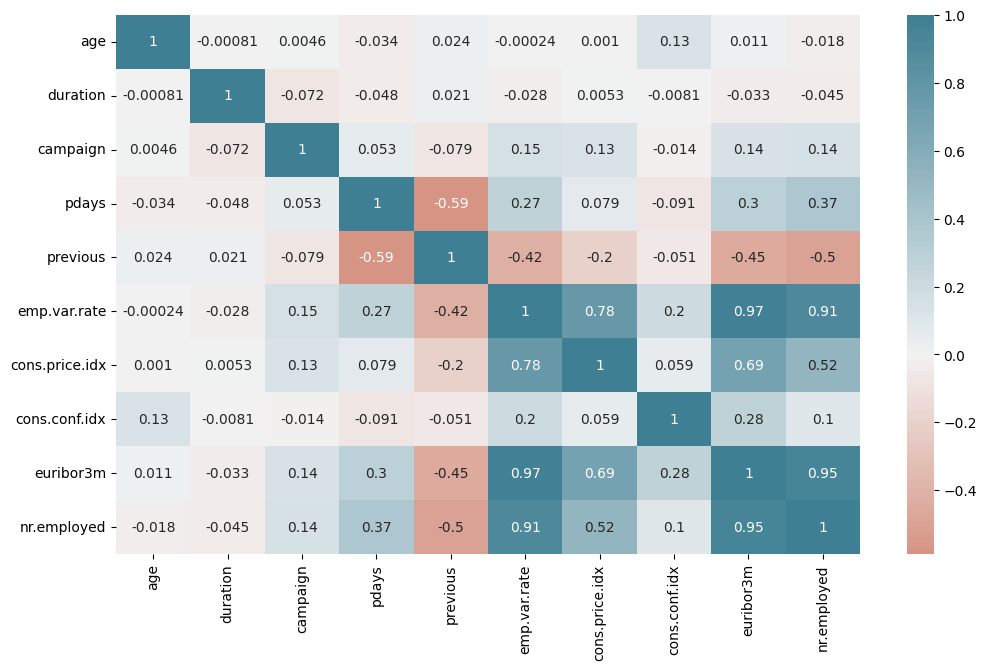

In [17]:
#heatmap for the data frame
plt.subplots(figsize = (12,7))
sns.heatmap(df1.corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200),center=0)

* Notice the strong correlation between nr.employed, euribor3m and consumer price index with the features.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [18]:
# Encode the categorical features and scale the numerical features
bank_scale=df1.copy()

# remove 'pdays' and 'default' columns
bank_scale= bank_scale.drop(['pdays', 'default'], axis=1)

bank_scale.y.replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables
categorical_cols= ['job','marital', 'education',  'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y']
feature_scale=[feature for feature in bank_scale.columns if feature not in categorical_cols]
# convert numeric values through scaler
scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

scaled_data = pd.concat([bank_scale[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
# Convert categorical values to numbers
categorical_cols1= ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,y,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1.533143,0.010352,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,1,0,0,0,1,0,0,0,1,0
1,0,1.629107,-0.421577,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,1,0,0,0,1,0,0,0,1,0
2,0,-0.290177,-0.124626,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,1,0,0,0,1,0,0,0,1,0
3,0,-0.002284,-0.413864,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,1,0,0,0,1,0,0,0,1,0
4,0,1.533143,0.187751,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,1,0,0,0,1,0,0,0,1,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
X = scaled_data.iloc[:,1:]
Y = scaled_data.iloc[:,-0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533143,0.010352,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
1,1.629107,-0.421577,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290177,-0.124626,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002284,-0.413864,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533143,0.187751,-0.565963,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [21]:
# reate a baseline model using Linear regression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('The MSE is', mean_squared_error(y_test, y_pred))
print('r2 score:' , r2_score(y_test, y_pred))

The MSE is 0.06653001318097941
r2 score: 0.3476629023195451


In [22]:
# now lets try the ridge model
from sklearn.metrics import accuracy_score

ridge = Ridge()
ridge.fit(X_train, y_train)
predicted_y = ridge.predict(X_test)
from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(y_test, predicted_y))
print('R2score:',ridge.score(X_test,predicted_y))



The MSE is 0.06653451022073982
R2score: 1.0


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [27]:
#build a logistic regression model
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
predictions = LogR.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [30]:
# Accuracy Score
print(accuracy_score(y_test, predictions))

0.9067433012223751


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

LR: 0.912223 (0.005985)
KNN: 0.898865 (0.006280)
CART: 0.889533 (0.004589)
NB: 0.871110 (0.005619)


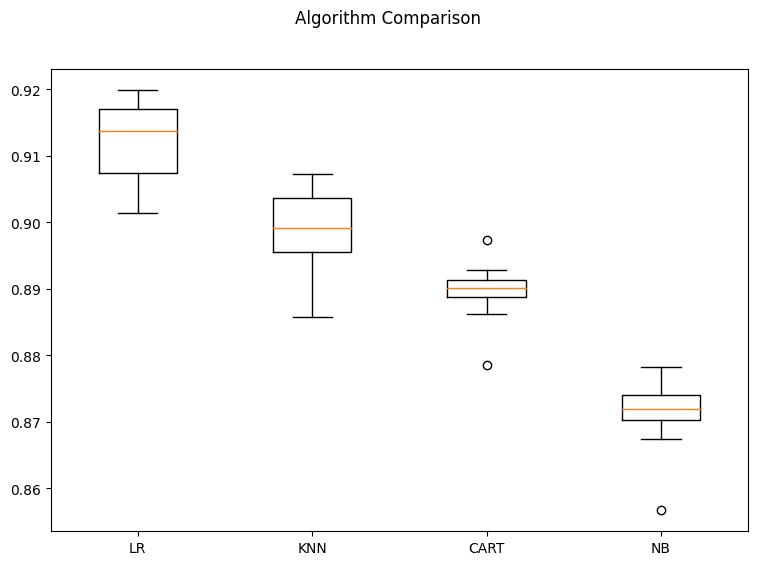

In [34]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=42,shuffle=True)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_c)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_c)
plt.show()

The Logistic regression model is performing better, lets try to improve the model.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [35]:
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

LogisticRegression()

In [36]:
# tune hyperparameters
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [40]:
# predict
predictions = LogR.predict(X_test)

In [41]:
# Accuracy Score
print(accuracy_score(y_test, predictions))

0.9067433012223751


<Axes: ylabel='Feature'>

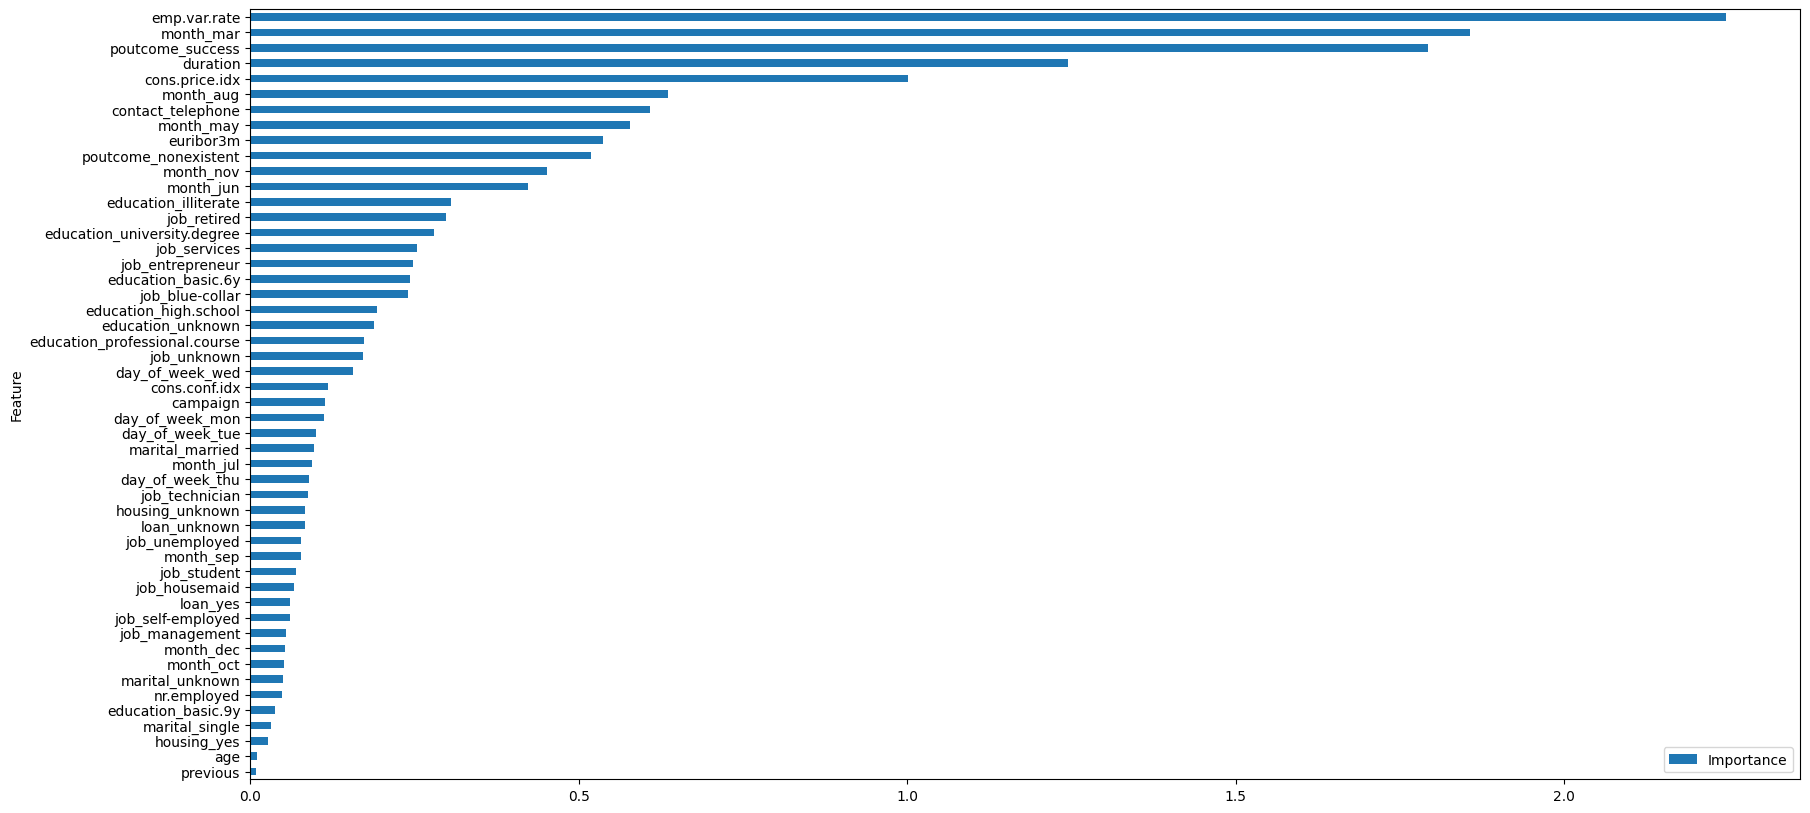

In [42]:
# feature comparision
coefficients=LogR.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(20, 10))

### Recommendations :

> **Appropriate Timing**: The timing of the marketing campaign during the year is important. The campaigns ran duing the months of March, August and May are more likely to enrol customers to the program.

> **Economy** : The external financial factors like High employment rate (emp.var.rate), Better CPI (Consumer price index ), euribor (3 month interest rate) are also important factors to consider.

>**Duration and Previous Campaign** : Duration of the call and Previous outcome may not be good indicators, as the duration of the call may just mean the people who enrolled actually spend more time to complete the enrollment process.



